# Model Performance Notebook
This notebook contains the epochs and performance of each relevant model

## Modeling

## Model 4

In [86]:
history4 = model4.fit(
    train_data,
    batch_size=16,
    validation_data=valid_data,
    epochs=10,
    callbacks=[early_stop,cp_callback])

Epoch 1/10
63/63 [==============================] - 115s 2s/step - loss: 0.1937 - accuracy: 0.9225 - val_loss: 0.4727 - val_accuracy: 0.7975
Epoch 2/10
63/63 [==============================] - 127s 2s/step - loss: 0.1882 - accuracy: 0.9275 - val_loss: 0.4196 - val_accuracy: 0.8300
Epoch 3/10
63/63 [==============================] - 136s 2s/step - loss: 0.1838 - accuracy: 0.9320 - val_loss: 0.3291 - val_accuracy: 0.8950
Epoch 4/10
63/63 [==============================] - 109s 2s/step - loss: 0.1872 - accuracy: 0.9350 - val_loss: 0.2658 - val_accuracy: 0.9150
Epoch 5/10
63/63 [==============================] - 111s 2s/step - loss: 0.1847 - accuracy: 0.9305 - val_loss: 0.2324 - val_accuracy: 0.9125
Epoch 6/10
63/63 [==============================] - 107s 2s/step - loss: 0.1633 - accuracy: 0.9400 - val_loss: 0.2989 - val_accuracy: 0.8600
Epoch 7/10
63/63 [==============================] - 124s 2s/step - loss: 0.1995 - accuracy: 0.9230 - val_loss: 0.2831 - val_accuracy: 0.9175
Epoch 8/10
63

Epoch 10:

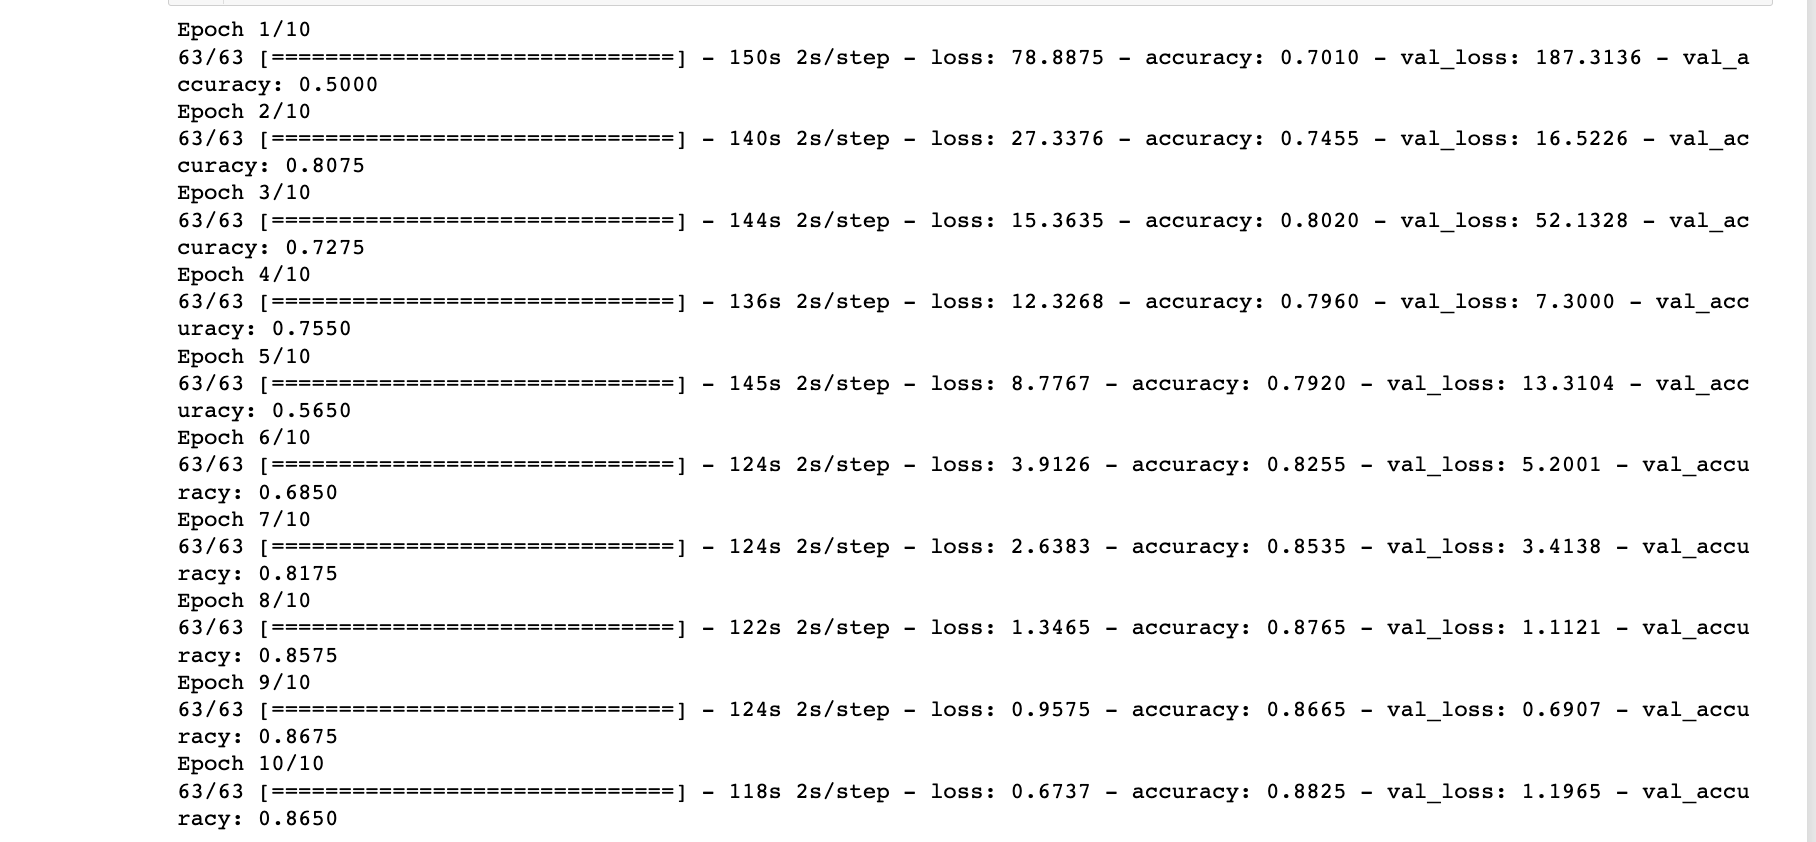

## Model 11

In [215]:
history11 = model11.fit(
    train_data,
    batch_size=32,
    validation_data=valid_data,
    epochs=5,
    callbacks=[early_stop,model_checkpoint_callback])

## Epochs 20-25

Epoch 1/5
63/63 [==============================] - 94s 1s/step - loss: 1.4813 - accuracy: 0.7955 - val_loss: 2.3252 - val_accuracy: 0.6450
Epoch 2/5
63/63 [==============================] - 86s 1s/step - loss: 0.8931 - accuracy: 0.8560 - val_loss: 1.3040 - val_accuracy: 0.7050
Epoch 3/5
63/63 [==============================] - 84s 1s/step - loss: 1.2144 - accuracy: 0.8240 - val_loss: 0.5967 - val_accuracy: 0.9050
Epoch 4/5
63/63 [==============================] - 85s 1s/step - loss: 1.3956 - accuracy: 0.8290 - val_loss: 0.8587 - val_accuracy: 0.8275
Epoch 5/5
63/63 [==============================] - 86s 1s/step - loss: 1.1521 - accuracy: 0.8505 - val_loss: 0.8036 - val_accuracy: 0.8225


Epochs 1-10

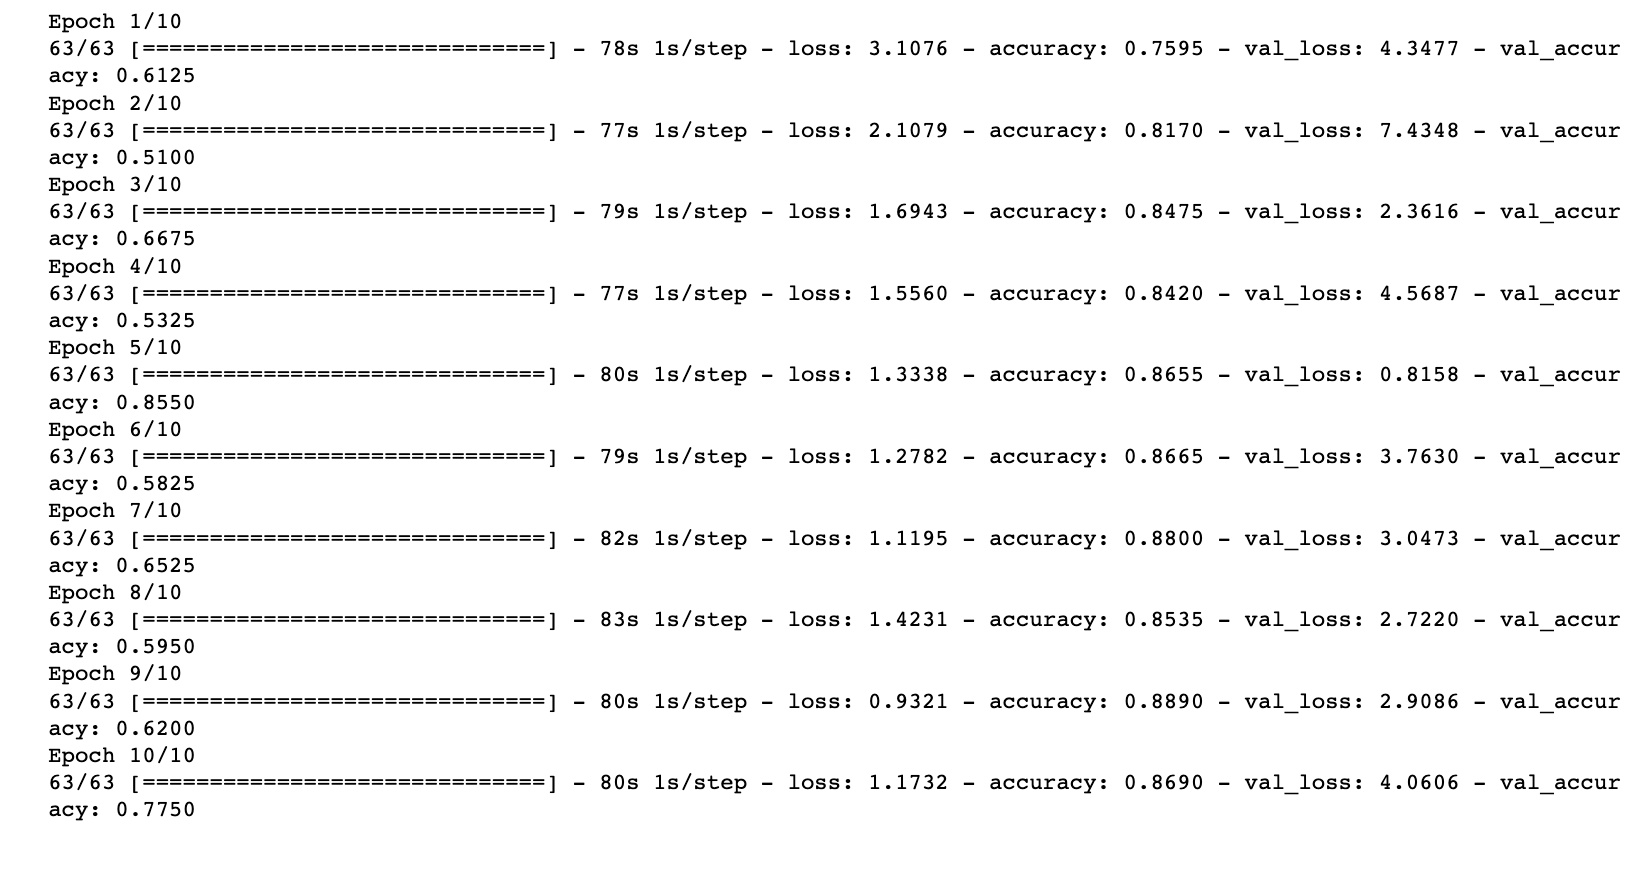

Epochs 10-20

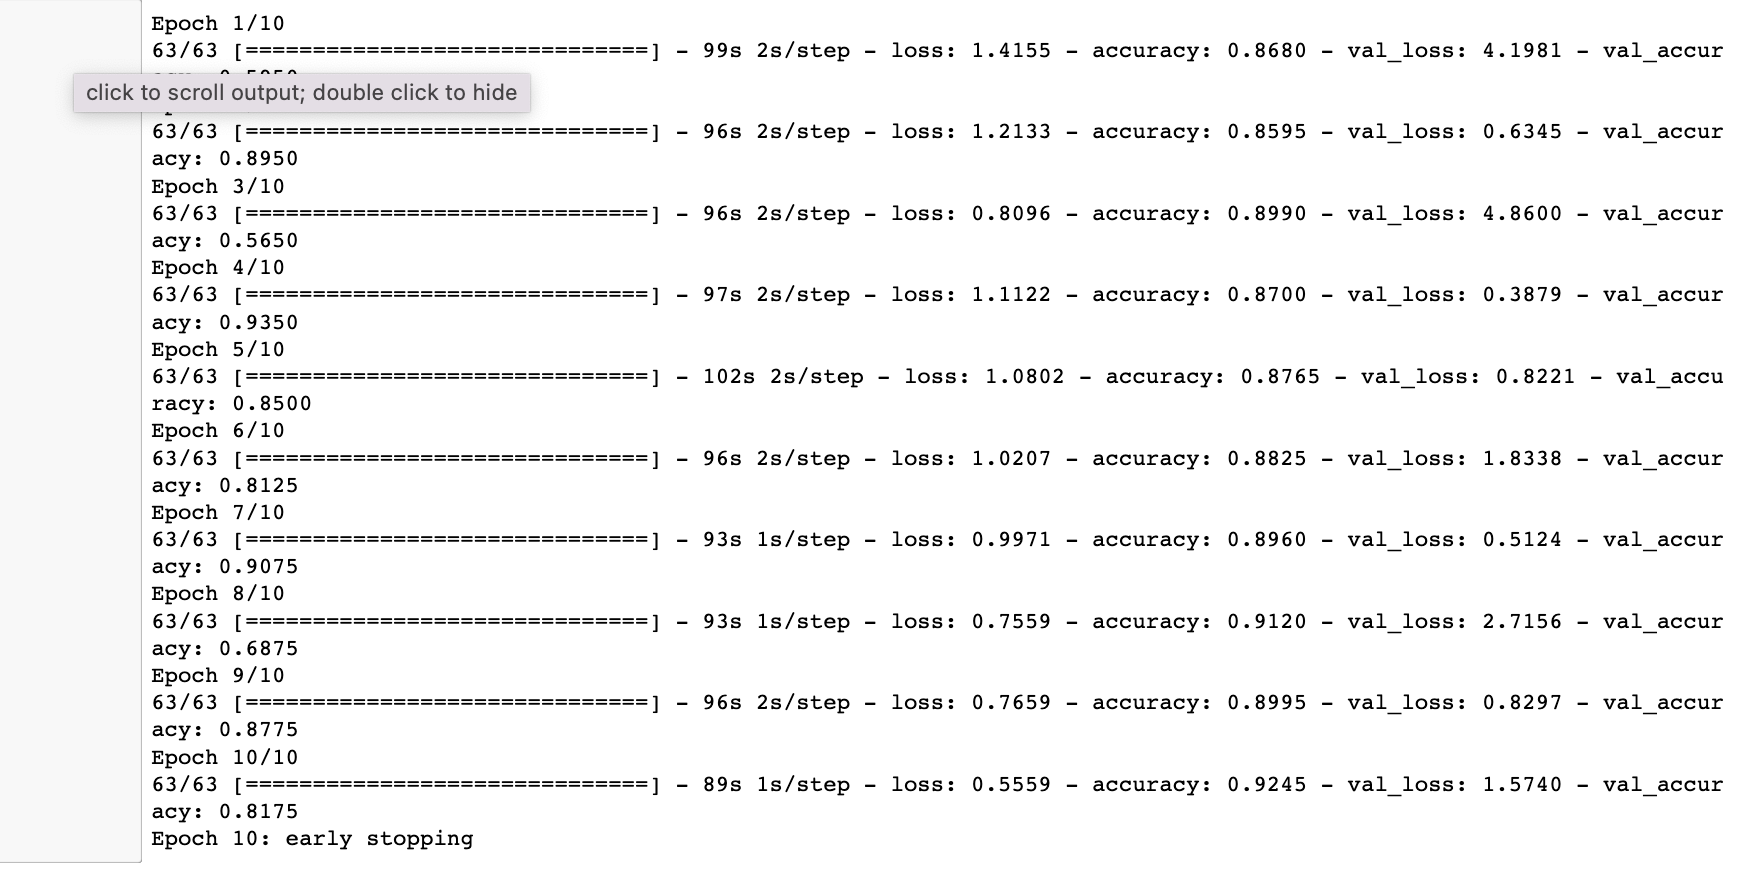

In [27]:
# instantiating model
model = Sequential()

# Convulutional Input Layer
model.add(Conv2D(
    input_shape=(256,256,1), # Input Shape set to match image shape 256,256,1
    filters=32, # filters at 32, should be fine to not overfit
    kernel_size=(3,3), # 3x3x1 for grayscale images 
    activation='relu', 
    padding='same')) # same spatial dimensions as inputs padding evenly left to right

# downsampling input along spatial dimensions
model.add(MaxPool2D(
      pool_size=(2,2)))

# hidden layer with dropout of 20 percent and l2 regularizer of 5%
model.add(Dense(128, 
                activation='relu',
                kernel_regularizer=l2(0.05)))
model.add(Dropout(.20))

# make the multidimensional input one-dimensional
model.add(Flatten())

# binary output layer
model.add(Dense(1,
    activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_accuracy', # monitoring validation accuracy
    min_delta=0.03, # want to see 3% change in performance
    verbose=1, # display callback message
    patience=6) # setting to 6 epochs due to consistent flucuation 
                # and strong performance in late epochs

In [29]:
history = model.fit(
    train_data,
    batch_size=32,
    validation_data=valid_data,
    epochs=10,
    callbacks=[early_stop])

Epoch 1/10
63/63 [==============================] - 141s 2s/step - loss: 209.1706 - accuracy: 0.6470 - val_loss: 36.3418 - val_accuracy: 0.7300
Epoch 2/10
63/63 [==============================] - 130s 2s/step - loss: 13.0618 - accuracy: 0.8145 - val_loss: 8.5381 - val_accuracy: 0.7350
Epoch 3/10
63/63 [==============================] - 141s 2s/step - loss: 6.8051 - accuracy: 0.8365 - val_loss: 16.5795 - val_accuracy: 0.5900
Epoch 4/10
63/63 [==============================] - 155s 2s/step - loss: 4.8125 - accuracy: 0.8645 - val_loss: 11.3727 - val_accuracy: 0.5775
Epoch 5/10
63/63 [==============================] - 157s 2s/step - loss: 3.6677 - accuracy: 0.8760 - val_loss: 6.2905 - val_accuracy: 0.6900
Epoch 6/10
63/63 [==============================] - 165s 3s/step - loss: 3.2099 - accuracy: 0.8695 - val_loss: 7.5065 - val_accuracy: 0.5825
Epoch 7/10
63/63 [==============================] - 138s 2s/step - loss: 2.5093 - accuracy: 0.8935 - val_loss: 4.1916 - val_accuracy: 0.6950
Epoch 7

### Model 1 Results:
- Pro: loss function consistently dropping w/accuracy consistently rising
- Con: Val_loss all over the place, val_accuracy stagnant
    

Model 1 was overfit/loss definition likely errored. Measures to counter: 
- added BatchNorms after each layer 
- an additional dense layer with fewer neurons w/similar penalties
- harsher l2 penalties 
- harsher dropouts

## Model 2

In [24]:
# instantiating model
model2 = Sequential()

# Convulutional Input Layer
model2.add(Conv2D(
    input_shape=(256,256,1),
    filters=32, # keeping filters at 32 
    kernel_size=(3,3), 
    activation='relu', 
    padding='same')) 

# maintaining mean and std output close to 0 and 1
model2.add(BatchNormalization())

model2.add(MaxPool2D(
      pool_size=(2,2)))

# hidden layer with dropout of 20 percent and l2 regularizer of 5%
model2.add(Dense(128, 
                activation='relu',
                kernel_regularizer=l2(0.05)))
model2.add(Dropout(.20))

# adding Conv2D layer
model2.add(Conv2D(
filters=16, # reducing filters to 16 to counter overfitting
kernel_size=(3,3),
activation='relu',
padding='same'))

model2.add(BatchNormalization())

# hidden layer with dropout of 10 percent and l2 regularizer of 1%
model2.add(Dense(32, 
                activation='relu',
                kernel_regularizer=l2(0.01)))

# batch norm
model2.add(BatchNormalization())

model2.add(Dropout(.15))

# downsampling input along spatial dimensions
model2.add(MaxPool2D
          (pool_size=(2, 2)))

# make the multidimensional input one-dimensional
model2.add(Flatten())

# binary output layer
model2.add(Dense(1,
    activation='sigmoid'))

In [25]:
model2.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_accuracy', # monitoring validation accuracy
    min_delta=0.03, # want to see 3% change in performance
    verbose=1, # display callback message
    patience=6) # setting to 6 epochs due to consistent flucuation 
                # and strong performance in late epochs

In [26]:
history2 = model2.fit(
    train_data,
    batch_size=32,
    validation_data=valid_data,
    epochs=10,
    callbacks=[early_stop])

Epoch 1/10
63/63 [==============================] - 299s 5s/step - loss: 5.2506 - accuracy: 0.8020 - val_loss: 6.7274 - val_accuracy: 0.7650
Epoch 2/10
63/63 [==============================] - 290s 5s/step - loss: 3.6712 - accuracy: 0.8700 - val_loss: 4.3880 - val_accuracy: 0.6800
Epoch 3/10
63/63 [==============================] - 345s 5s/step - loss: 3.3636 - accuracy: 0.8660 - val_loss: 3.5759 - val_accuracy: 0.7700
Epoch 4/10
63/63 [==============================] - 327s 5s/step - loss: 2.7538 - accuracy: 0.8885 - val_loss: 2.1293 - val_accuracy: 0.8950
Epoch 5/10
63/63 [==============================] - 312s 5s/step - loss: 2.1838 - accuracy: 0.9060 - val_loss: 6.4769 - val_accuracy: 0.7725
Epoch 6/10
63/63 [==============================] - 316s 5s/step - loss: 1.6054 - accuracy: 0.9265 - val_loss: 4.1565 - val_accuracy: 0.7775
Epoch 7/10
63/63 [==============================] - 320s 5s/step - loss: 1.9264 - accuracy: 0.9055 - val_loss: 2.9225 - val_accuracy: 0.7975
Epoch 8/10
63

### Model 2 Results
Model 2 is better, still overfit, potential issue could be "complexity" of model. Val_loss jumped on the last epoch indicating overfiting, though may just need more time to run.

Model 3 will:
- reduce filters in input layer
- remove dense layer 
- drastically harsh l2 penalty
- harsher dropout
- learning rate from .001 to .01

## Model 3

In [27]:
# instantiating model
model3 = Sequential()

# Convulutional Input Layer
model3.add(Conv2D(
    input_shape=(256,256,1), # Input Shape 
    filters=16, # reducing filters to 16 to avoid overfitting
    kernel_size=(3,3), # 3x3x1 for grayscale images 
    activation='relu', 
    padding='same')) # same spatial dimensions as inputs padding evenly left to right

# adding batch norm 
model3.add(BatchNormalization())

# downsampling input along spatial dimensions
model3.add(MaxPool2D(
      pool_size=(2,2)))

# hidden layer with dropout of 30 percent and l2 regularizer of 10% to counter overfitting
model3.add(Dense(128, 
                activation='relu',
                kernel_regularizer=l2(0.1)))
model3.add(Dropout(.30))

# another batch norm
model3.add(BatchNormalization()) # wrong spot!

# make the multidimensional input one-dimensional
model3.add(Flatten())

# binary output layer
model3.add(Dense(1,
    activation='sigmoid'))

In [28]:
opt = keras.optimizers.Adam(learning_rate=0.01) # increasing learning rate to counter overfitting

model3.compile(loss='binary_crossentropy', 
              optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_accuracy', # monitoring validation accuracy
    min_delta=0.03, # want to see 3% change in performance
    verbose=1, # display callback message
    patience=6) # setting to 6 epochs due to consistent flucuation 
                # and strong performance in late epochs

In [29]:
history3 = model3.fit(
    train_data,
    batch_size=32,
    validation_data=valid_data,
    epochs=10,
    callbacks=[early_stop])

Epoch 1/10
63/63 [==============================] - 193s 3s/step - loss: 80.4135 - accuracy: 0.7865 - val_loss: 26.3385 - val_accuracy: 0.7650
Epoch 2/10
63/63 [==============================] - 183s 3s/step - loss: 42.0023 - accuracy: 0.8300 - val_loss: 265.1301 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 196s 3s/step - loss: 34.2801 - accuracy: 0.8390 - val_loss: 37.6865 - val_accuracy: 0.7525
Epoch 4/10
63/63 [==============================] - 200s 3s/step - loss: 19.5586 - accuracy: 0.8525 - val_loss: 16.3355 - val_accuracy: 0.8125
Epoch 5/10
63/63 [==============================] - 208s 3s/step - loss: 12.3095 - accuracy: 0.8665 - val_loss: 17.9018 - val_accuracy: 0.7225
Epoch 6/10
63/63 [==============================] - 210s 3s/step - loss: 7.5684 - accuracy: 0.8705 - val_loss: 7.7954 - val_accuracy: 0.7950
Epoch 7/10
63/63 [==============================] - 212s 3s/step - loss: 5.3574 - accuracy: 0.8625 - val_loss: 9.4122 - val_accuracy: 0.7825
Ep

### Model 3 Results
Model 3 loss consisently decreasing, accuracy is stagnant. Val loss and acc stagnant as well, learning rate maybe too high but first will try:
- will try conv > batch norm > activation > dropout > pool
- keeping only droput and not regularizer
- reduce dense neurons to 64
- reduce batch_size to 16
- increase/decresing learning rate?

## Model 12

In [93]:
model12 = tf.keras.models.Sequential([
    # Input Layer
    tf.keras.layers.Conv2D(input_shape=(256,256,1),padding='same',filters=16,kernel_size=(3,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,padding='same'),
    
    # Dense Layer
    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.MaxPool2D(2,padding='same'),
    
    # Dense to Output
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Activation('sigmoid')
])

opt = keras.optimizers.Adam(learning_rate = 0.003, 
                            beta_1 = 0.9, beta_2 = 0.999, # averaging over learned iterations
                            epsilon = 0.1, decay = 0.0)

model12.compile(loss='binary_crossentropy', 
                optimizer=opt, metrics=['accuracy'])

annealer = ReduceLROnPlateau(monitor = 'val_accuracy', # Reduce LR if val_acc is stagnant
                             factor = 0.70, # Rate the learning rate will decrease
                             patience = 5, # epochs to wait 
                             verbose = 1, # Notify
                             min_lr = 1e-4) # lower limit on LR

# es = EarlyStopping(
#     monitor='val_loss', 
#     mode='min',
#     baseline=.03,
#     verbose=1, 
#     patience=3)